In [15]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="keras")

In [16]:
# Load dataset directly from the Keras library
(X_train, y_train), (X_test, y_test) = mnist.load_data()

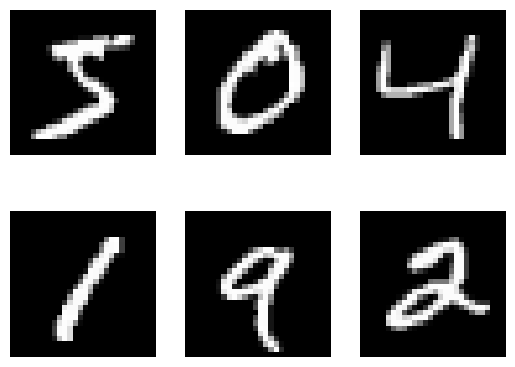

In [17]:
# Plot the first six samples of the MNIST training dataset as grayscale images
for i in range(6):
    plt.subplot(230 + i + 1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')  # Hide axis ticks
plt.show()

In [18]:
# Reshape format [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')


In [19]:
# Convert class vectors (integers) to binary class matrix
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [20]:
# Normalize inputs
X_train /= 255
X_test /= 255

In [21]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False
)
datagen.fit(X_train)

In [22]:
# Define a CNN model with Input layer
def create_model():
    num_classes = 10
    model = Sequential()
    
    # Add an Input layer
    model.add(Input(shape=(28, 28, 1)))  # Specify the input shape here
    
    # Convolutional layers
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# Build the model
model = create_model()

In [23]:
# Fit the model with data augmentation
model.fit(datagen.flow(X_train, y_train, batch_size=200),
          validation_data=(X_test, y_test),
          epochs=10, verbose=2)

print("The model has successfully trained.")

Epoch 1/10
300/300 - 52s - 175ms/step - accuracy: 0.9018 - loss: 0.3262 - val_accuracy: 0.1913 - val_loss: 6.4387
Epoch 2/10
300/300 - 51s - 169ms/step - accuracy: 0.9625 - loss: 0.1201 - val_accuracy: 0.9112 - val_loss: 0.2661
Epoch 3/10
300/300 - 53s - 178ms/step - accuracy: 0.9718 - loss: 0.0935 - val_accuracy: 0.9874 - val_loss: 0.0429
Epoch 4/10
300/300 - 53s - 178ms/step - accuracy: 0.9765 - loss: 0.0794 - val_accuracy: 0.9892 - val_loss: 0.0342
Epoch 5/10
300/300 - 53s - 176ms/step - accuracy: 0.9782 - loss: 0.0713 - val_accuracy: 0.9874 - val_loss: 0.0439
Epoch 6/10
300/300 - 52s - 175ms/step - accuracy: 0.9792 - loss: 0.0674 - val_accuracy: 0.9847 - val_loss: 0.0469
Epoch 7/10
300/300 - 53s - 176ms/step - accuracy: 0.9800 - loss: 0.0635 - val_accuracy: 0.9894 - val_loss: 0.0319
Epoch 8/10
300/300 - 52s - 174ms/step - accuracy: 0.9819 - loss: 0.0597 - val_accuracy: 0.9786 - val_loss: 0.0732
Epoch 9/10
300/300 - 52s - 175ms/step - accuracy: 0.9825 - loss: 0.0562 - val_accuracy: 

In [24]:
# Save the model
model.save('model.keras')
print("The model has successfully saved.")

The model has successfully saved.


In [25]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN error: %.2f%%" % (100 - scores[1] * 100))

CNN error: 0.71%
